# Investigating data for  1000 Twitch Streamers
## by Mohannad Mahmoud

## Investigation Overview

> The main goal of this presentation is to showcase main deatures of this data set and show observations based on Channel Languages

## Dataset Overview

> Gaming is a very big industry now.Twitch has been a home to streamers since day 1 and now that Mixer has been shut down, streamers are returning to the platform again.Millions, if not billions, watch twitch streams everyday. The Data contains observations for a 1000 Twich Streamers where 1 observation is a Streamer Channel with the maind data repoted being :[ Watch time(Minutes)	| Stream time(minutes) | Average viewers | Followers Partnered	| Mature | Language]

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset and perform pre-processing
df= pd.read_csv("twitchdata-update.csv")
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().replace("(", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().replace(")", ""), inplace=True)
numeric_vars = ['watch_time_minutes','stream_time_minutes','peak_viewers','average_viewers','followers','followers_gained','views_gained']
categoric_vars = ['partnered','mature','language']
df2 = df.query('watch_time_minutes < 1000000000').query('peak_viewers<400000').query('average_viewers<15000').query('average_viewers < 50000').query('followers < 2600000').query('followers_gained<3000000').query('views_gained < 800000000').query('stream_time_minutes < 300000')
df2 = df2.reset_index()
df3 = df2.query('language != "Other" & language != "Slovak" & language != "Greek" & language != "Finnish"& language != "Swedish"')



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Followers in the datased

> The data was mostly right skewed so log sacled histograms showed mostly normal distrubtions.. Lots of outliers needed to be removed in order to properly observe trends

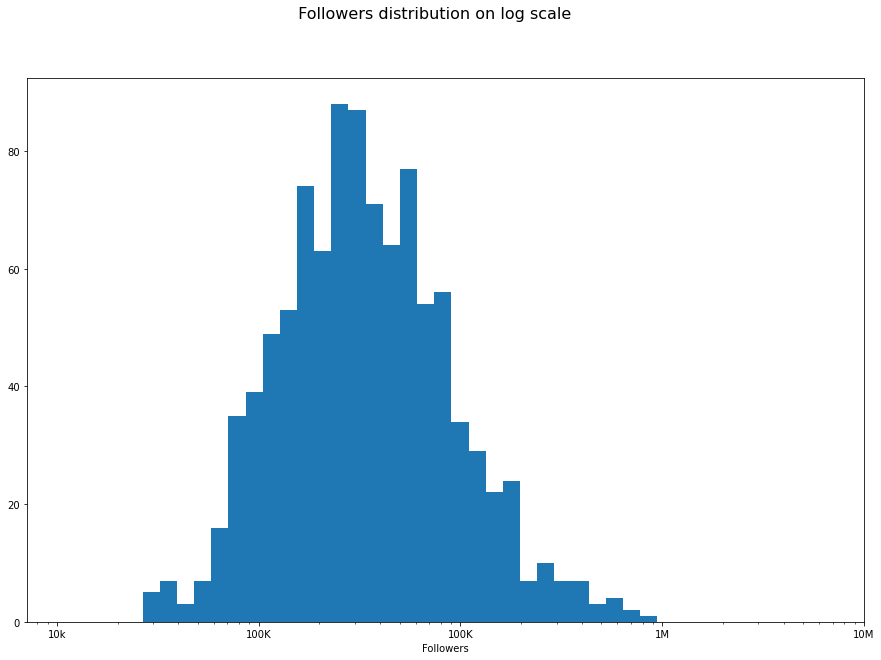

In [3]:
log_binsize = 0.085
bins = 10 ** np.arange(4, np.log10(df.followers.max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df, x = 'followers', bins = bins)
plt.xscale('log')
plt.xticks([1e4, 1e5, 1e6, 1e7, 1e8], [ '10k', '100K', '100K', '1M', '10M'])
plt.xlabel('Followers')
plt.suptitle(' Followers distribution on log scale', fontsize = 16);
plt.show();

## Bar plot for partenered and not partenered count.

> The ratio of partnered to non-patnered channels was huge thus no conclusion can be dine including this variabe.

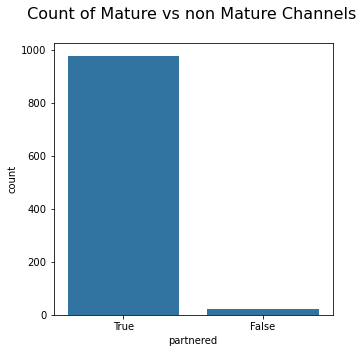

In [9]:
#Comparing count of observations based on the partenerd categorical variable
type_counts = df.partnered.value_counts()
type_order = type_counts.index

plt.figure(figsize=[5,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'partnered', color = default_color , order=type_order);
plt.suptitle(' Count of Mature vs non Mature Channels', fontsize = 16);


## Bar plot for count of channels across languages for both mature and non-mature content 
>(Enlgish was removed because it was highly dominant). French and German channels show high ratios



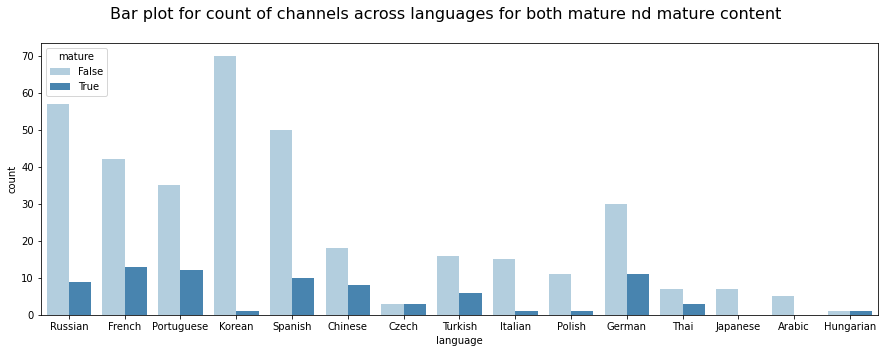

In [8]:
plt.figure(figsize = [15,5])
sb.countplot(data = df3.query('language != "English"'), x = 'language', hue = 'mature', palette = 'Blues');
plt.suptitle('Bar plot for count of channels across languages for both mature nd mature content', fontsize = 16);


## scatter plot of followers vs. average viewers
>Coloring based on type of content with marker sized by watch time in minutes, Average viewers shows positive correlation with watch time for the whole streaming time range. (The most interesting feature was the negative relationship between the streaming time and number of viewers).


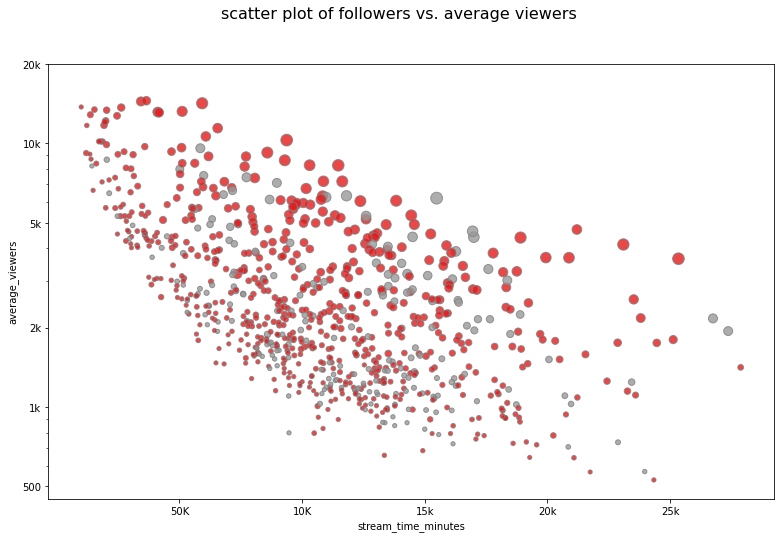

In [6]:
# scatter plot of followers vs. average viewers and coloring based on type of content with marker sized by watch time in minutes
s = df2.watch_time_minutes/7000000
plt.figure(figsize = [13,8])
plt.scatter(data = df2, x = 'stream_time_minutes', y = 'average_viewers' , c = 'mature', s = s, cmap="Set1", alpha=0.8, edgecolors="grey")
plt.xlabel('stream_time_minutes')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xticks([5e4 , 10e4 ,15e4, 20e4 ,25e4 ], ['50K', '10K', '15k', '20k', '25k'])
plt.suptitle('scatter plot of followers vs. average viewers', fontsize = 16);

plt.ylabel('average_viewers');

## Thanks for you attention
for any questions email me at mohannad_m@windowslive.com


In [1]:

!jupyter nbconvert filename.ipynb --to slides --no-input


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specif

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'filename.ipynb' matched no files



            > jupyter nbconvert --to html --template basic mynotebook.ipynb

            You can also pipe the output to stdout, rather than a file

            > jupyter nbconvert mynotebook.ipynb --stdout

            PDF is generated via latex

            > jupyter nbconvert mynotebook.ipynb --to pdf

            You can get (and serve) a Reveal.js-powered slideshow

            > jupyter nbconvert myslides.ipynb --to slides --post serve

            Multiple notebooks can be given at the command line in a couple of 
            different ways:

            > jupyter nbconvert notebook*.ipynb
            > jupyter nbconvert notebook1.ipynb notebook2.ipynb

            or you can specify the notebooks list in a config file, containing::

                c.NbConvertApp.notebooks = ["my_notebook.ipynb"]

            > jupyter nbconvert --config mycfg.py

To see all available configurables, use `--help-all`.



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!